<a href="https://colab.research.google.com/github/tigrannh/Data-Science-ML-projects/blob/main/Copy_of_KMeans_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans

In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()  # for plot styling
import numpy as np

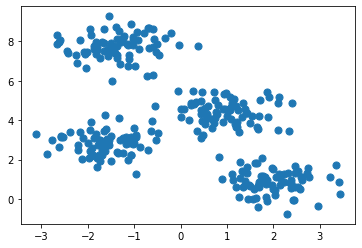

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, copy_x=True)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

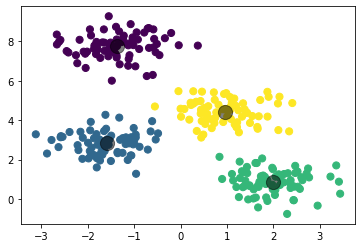

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Task: Implement K-means clustering without sklearn

In [ ]:
def kMeans(n_clusters, X, n_iterations=100):
  n = X.shape[0]
  rand = np.random.choice(n, n_clusters, replace=False)
  centers = X[rand]
  predict = np.zeros(n, dtype=int)

  for i in range(n_iterations):
    for j in range(n):
      predict[j] = np.argmin(np.sum((centers - X[j])**2, axis=-1), axis=-1)
    centers[:] = 0

    for s in range(n):
      centers[predict[s], :] += X[s]
    
    for s in range(n_clusters):
      centers[s] /= np.sum(predict == s)
  
  return centers, predict

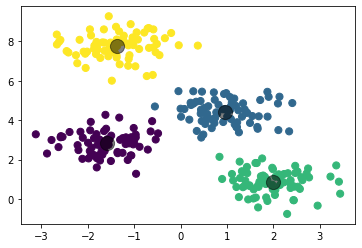

In [ ]:
cent, pred = kMeans(4, X, 300)
plt.scatter(X[:,0], X[:,1], c=pred, s=50, cmap='viridis')
plt.scatter(cent[:,0], cent[:,1], c='black', s=200, alpha=0.5)